### Initial Steps of the JPEG Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
from numpy import r_, pi, sin, cos

In [3]:
from scipy import signal
from scipy import misc

In [4]:
plt.rcParams['figure.figsize'] = (7, 7)

In [5]:
fontdict = {'fontsize': 30,
 'fontweight' : plt.rcParams['axes.titleweight'],
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}

In [6]:
einstein = plt.imread('einstein.png')[:,:,0].astype(float)[:256, :256]

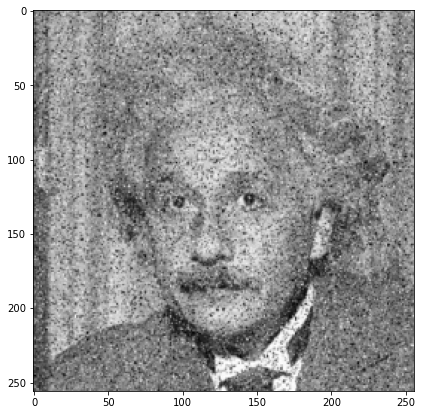

In [7]:
plt.imshow(einstein, cmap = 'gray')
plt.show()

## DCT coefficients and The DCT

In [8]:
# 2d-dct of images 
def dct2(a):
    return scipy.fft.dct( scipy.fft.dct( a, axis = 0, norm = 'ortho'), axis = 1, norm = 'ortho')

def idct2(a):
    return scipy.fft.idct( scipy.fft.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [9]:
im = einstein
imsize = im.shape
dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:i+8, j:j+8] = dct2(im[i:i+8, j:j+8])

###    display an 8x8 block

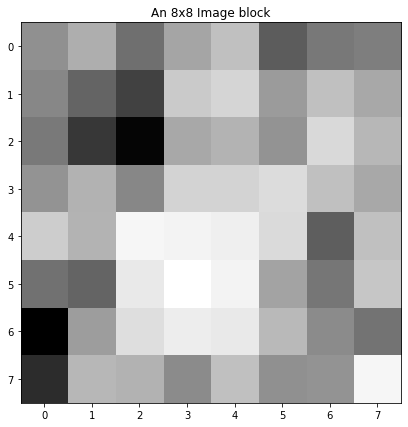

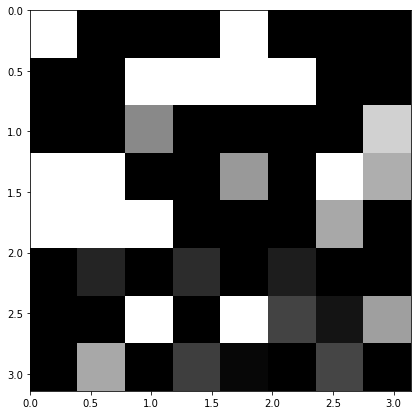

In [11]:
pos = 128

# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])

### The Full DCT

Text(0.5, 1.0, '8x8 DCTs of the image')

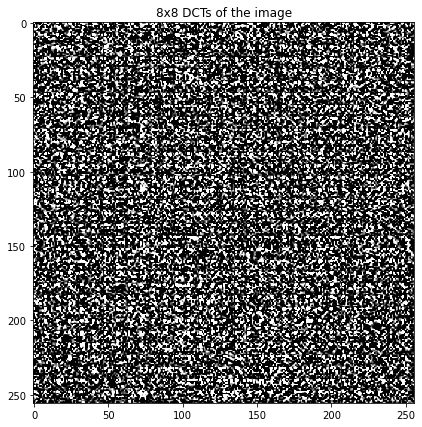

In [12]:
# Display entire DCT
plt.figure()
plt.imshow(dct, cmap='gray', vmax = np.max(dct)*0.01, vmin = 0)
plt.title( "8x8 DCTs of the image")

Keeping only 4.174805% of the DCT coefficients


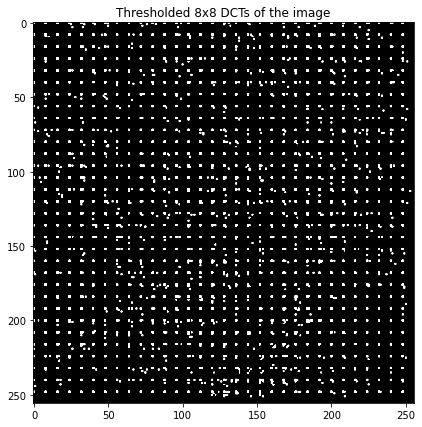

In [13]:
# Threshold
thresh = 0.036
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

above_thresh_dct = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print(f"Keeping only %f%% of the DCT coefficients" % (above_thresh_dct*100.0))

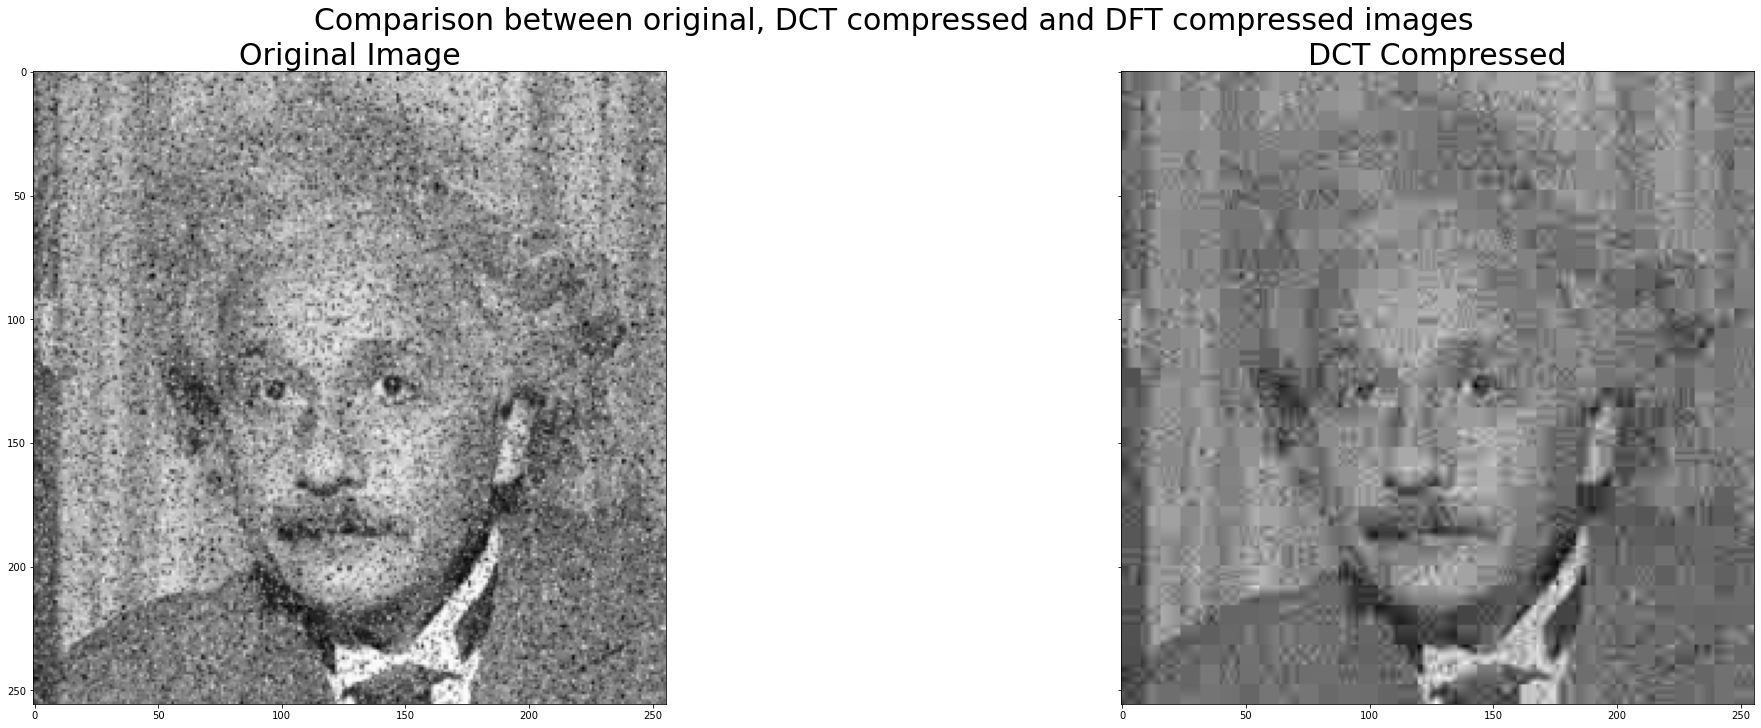

In [14]:
idct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        idct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
        
fig, ax = plt.subplots(1, 2, constrained_layout=True, sharey=True, figsize = (30,10))

fig.suptitle('Comparison between original, DCT compressed and DFT compressed images', fontsize=30);

ax[0].imshow(im, cmap = 'gray');
ax[0].set_title("Original Image", fontdict = fontdict);

ax[1].imshow(idct, cmap = 'gray');
ax[1].set_title("DCT Compressed", fontdict = fontdict);

## Comparison with DFT and DCT 

In [15]:
dft = np.zeros(imsize, dtype = 'complex')
idft = np.zeros(imsize, dtype = 'complex')

# 8x8
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dft[i:(i+8),j:(j+8)] = np.fft.fft2(im[i:(i+8),j:(j+8)])

In [16]:
thresh = 0.036
dft_thresh = dft * (abs(dft) > (thresh*np.max(np.abs(dft))))

above_thresh_dft = np.sum( dft_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

# 8x8 iDFT
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        idft[i:(i+8),j:(j+8)] = np.fft.ifft2( dft_thresh[i:(i+8),j:(j+8)] )

Keeping only 4.174805% of the DCT coefficients
Keeping only 3.511047% of the DFT coefficients


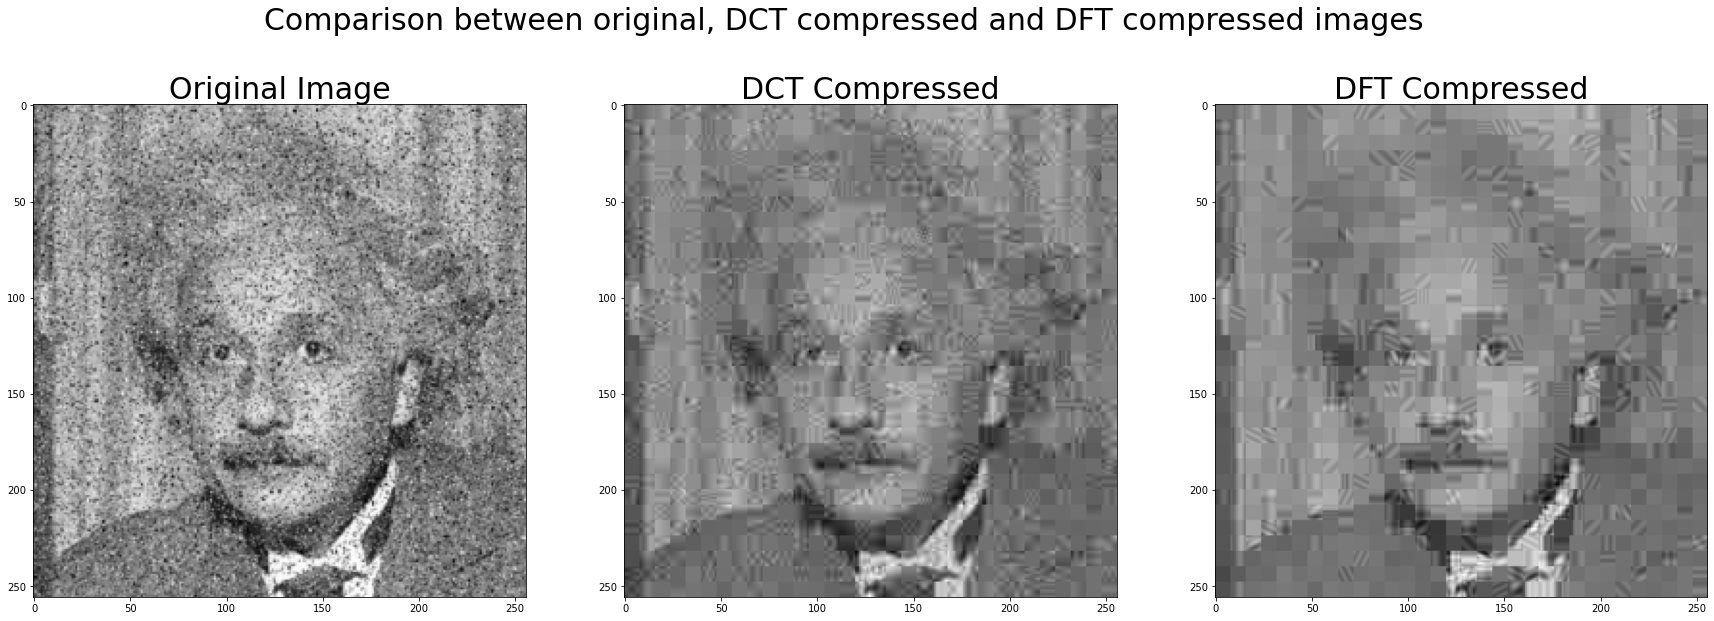

In [18]:
fig, ax = plt.subplots(1,3, figsize = (30,10))

fig.suptitle('Comparison between original, DCT compressed and DFT compressed images', fontsize=30);

ax[0].imshow(im, cmap = 'gray');
ax[0].set_title("Original Image", fontdict = fontdict);

ax[1].imshow(idct, cmap = 'gray');
ax[1].set_title("DCT Compressed", fontdict = fontdict);

ax[2].imshow(abs(idft), cmap = 'gray');
ax[2].set_title("DFT Compressed", fontdict = fontdict);

print(f"Keeping only %f%% of the DCT coefficients" % (above_thresh_dct*100.0)) 
print(f"Keeping only %f%% of the DFT coefficients" % (above_thresh_dft*100.0)) 

plt.show()

## END